In [19]:
#librerias utilizadas.
import math as mt
import numpy as np
import matplotlib.pylab as plt 

## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




vamos ha escribir el codigo correspondite a las series.

In [55]:


def serie_1(N): #Serie número uno.

  resultado = 0

  for i in range(1,2*N+1): #Ciclo para las sumatoria.
  
    resultado += ((-1)**i)*(i/(i+1))

  return resultado  

def serie_2(N): #Serie sumando números pares e impares.

  primera_sumatoria = 0
  segunda_sumatoria = 0    
  resiltado = 0

  for i in range (1,N+1): #Ciclo para las sumatorias.

    primera_sumatoria += (2*i - 1)/(2*i)
    segunda_sumatoria += (2*i)/(2*i+1)

  resultado = -primera_sumatoria + segunda_sumatoria

  return resultado

def serie_3(N): #Serie combinando las series de una forma analítica.
  
  resultado=0

  for i in range(1,N+1): #Ciclo para las sumatoria.

    resultado += 1/((2*i)*(2*i+1))

  return resultado  




Valores obtenidos por  las series con N =
100

In [56]:

print("Calculo utilizando la serie 1:",serie_1(100))
print("Calculo utilizando la serie 2:", serie_2(100))
print("Calculo utilizando la serie 3:", serie_3(100))

Calculo utilizando la serie 1: 0.30437144514006564
Calculo utilizando la serie 2: 0.30437144514002057
Calculo utilizando la serie 3: 0.3043714451400664


Realizar una grafica para ver el comportamiento las series para los N del 1 al 1000.

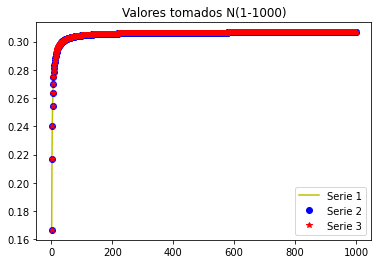

In [110]:
N = np.arange(1,1001,1)

serie1 = np.zeros(len(N))
serie2 = np.zeros(len(N))
serie3 = np.zeros(len(N))


for i,n in enumerate(N):
  
  serie1[i] = serie_1(n)
  serie2[i] = serie_2(n)
  serie3[i] = serie_3(n)


plt.figure
plt.title("Valores tomados N(1-1000)")
plt.plot(N,serie1,"y",label="Serie 1")
plt.plot(N,serie2,"bo",label="Serie 2")
plt.plot(N,serie3,"r*",label="Serie 3")
plt.legend()
plt.show()



Al ver el comportamiento que tienen las 3 series para los N entre 1 y 1000, se puede tener una idea de que estas convergen, para ser mas exacto las graficas nos dicen que estas tienden a converger a 0.30.

Considerar la serie 3 como solución exacta y realizar gráficos log ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$) de los errores relativos de las serie 1 y 2,con $N = 1\times 10^{6}$ y sabiendo que:


\begin{equation*} 
\epsilon_{rel}= \frac{|x-x^*|}{|x|}
\end{equation*}



Voy hacerlo hasta  $N = 1\times 10^{4}$ ya que con  $N = 1\times 10^{6}$ se demora mucho en terminar.



In [106]:
#Calcular los errores.

N_p = np.arange(1,10001,1)

Error_serie_1 = np.zeros(len(N_p)) 
Error_serie_2 = np.zeros(len(N_p))



for i,n in enumerate(N_p): #Ciclo para guardar los valores.
  
  Error_serie_1[i] = np.absolute(serie_1(n)-serie_3(n))/np.absolute(serie_1(n))
  Error_serie_2[i] = np.absolute(serie_2(n)-serie_3(n))/np.absolute(serie_2(n))



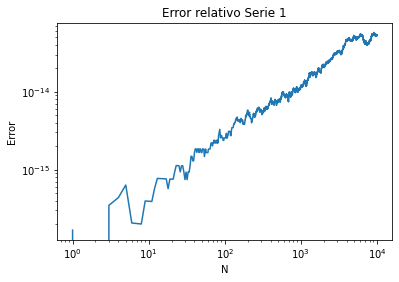

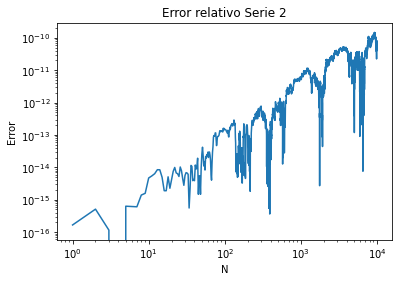

In [213]:
#Grafica log-log del error de la serie 1

plt.figure()
plt.title("Error relativo Serie 1")
plt.loglog(N_p,Error_serie_1)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("Error")
plt.show()

#Grafica log-log del error de la serie 2

plt.figure()
plt.title("Error relativo Serie 2")
plt.loglog(N_p,Error_serie_2)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("Error")
plt.show()






**Analisis:**  Por lo visto en la grafica "Valores tomados N(1-1000)" podemos notar que las 3 series son prácticamente la misma ya que tienen el mismo comportamiento y parecen converger al mismo valor.

Por otro lado de las graficas "Error relativo Serie 2" y "Error relativo Serie 2" vemos que el error de la serie 1 tiende a seguir un comportamiento con menos fluctuaciones y que el error disminuye mas rápido, mientras que el error de la serie 2 fluctúa mucho mas sin embargo en ambos casos podemos notar que mientras N aumenta el error disminuye.

## **Errores de redondeo**. Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logistico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.


> ### Problema: 
Encontrar tres formas diferentes de expresar $f(x)$  y calcular la evolución de la misma condición inicial después de cientos de iteraciones. Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 


>#### Hint: valores numéricos de r y x0 que puede tomar:


```python
    >>> r = [1.9, 2.9, 3.1, 3.5, 3.9]

    >>> x0 = 0.6 # any number in [0,1] will do here

    >>> numpoints = 100
       ```
       

Expresar $f(x)$ de 3 formas diferentes.

Forma 1:
$f(x_n)=r(x_n-x_n^2)$ 

In [178]:
def f1(x,r): #Función de la forma 1

  x = r*(x-x**2)

  return x

Forma 2:
$f(x_n)=rx_n-rx_n^2$ 

In [179]:
def f2(x,r): #Función de la forma 2

  x = (r*x)-(r*x**2)

  return x

Forma 3: $f(x_n)=rx_n^2(1/x_n-1)$

In [182]:
def f3(x,r): #Función de la forma 3

  x = r*(x**2)*((1/x)-1)

  return x

Codigo para el mapa logistico.

In [207]:


def mapa_logistico(xi, r, Ntiempos,k):
 
  poblacion_ = np.zeros(Ntiempos)
  for i in range(0, Ntiempos):
    xn = k(xi, r)
    xi = xn
    poblacion_[i] = xn

  return poblacion_ 



Ntiempos = 100
N = np.arange(0, Ntiempos, 1)
r =  [1.9, 2.9, 3.1, 3.5, 3.9]





Crear el mapa logistico para la forma 1.

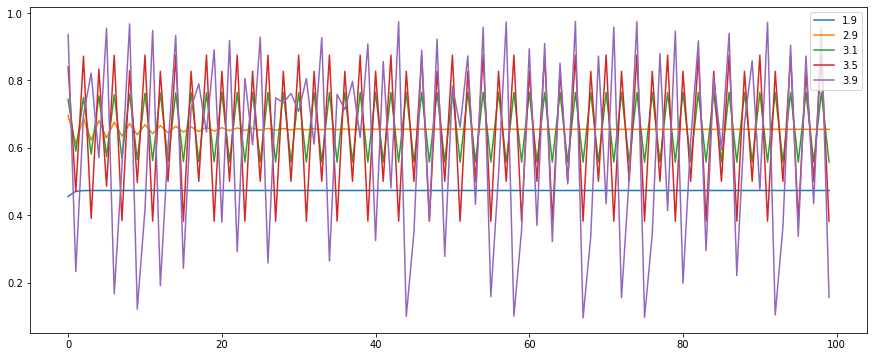

In [209]:
plt.figure(figsize=(15,6))
  
for i in range(0, len(r) ):

  p1 = mapa_logistico(0.6, r[i], Ntiempos,f1)
  plt.plot(N, p1, label=""+str(r[i])+"")
  
plt.legend(loc=1)
plt.show()

Crear el mapa logistico para la forma 2.

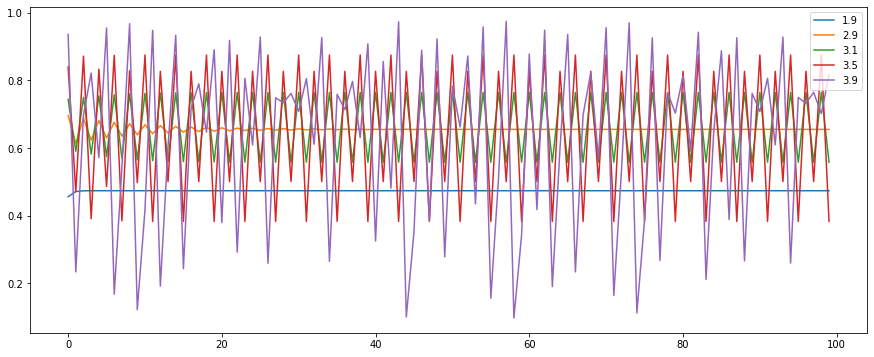

In [210]:
plt.figure(figsize=(15,6))
  
for i in range(0, len(r) ):

  p1 = mapa_logistico(0.6, r[i], Ntiempos,f2)
  plt.plot(N, p1, label=""+str(r[i])+"")
  
plt.legend(loc=1)
plt.show()

Crear el mapa logistico para la forma 3.

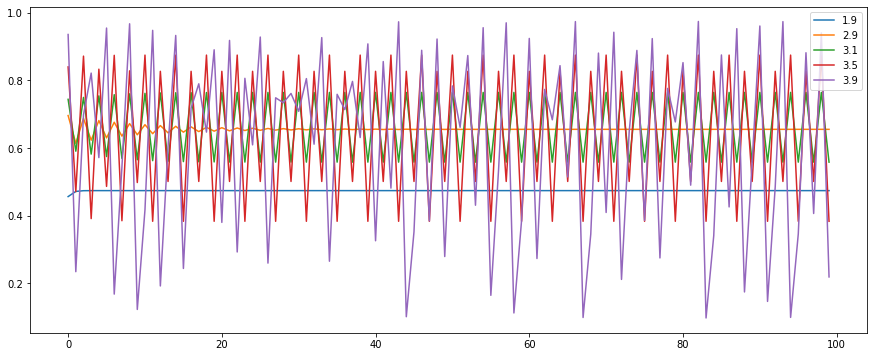

In [211]:
plt.figure(figsize=(15,6))
  
for i in range(0, len(r) ):

  p1 = mapa_logistico(0.6, r[i], Ntiempos,f3)
  plt.plot(N, p1, label=""+str(r[i])+"")
  
plt.legend(loc=1)
plt.show()